In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math

from scipy import stats
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier

In [2]:
from matplotlib import rcParams
rcParams["figure.figsize"] = (12, 6)
rcParams["lines.linewidth"] = 3
rcParams["xtick.labelsize"] = "x-large"
rcParams["ytick.labelsize"] = "x-large"

In [3]:
data1 = pd.read_csv("train.csv")
data1.shape

(891, 12)

In [4]:
data1.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
157,158,0,3,"Corn, Mr. Harry",male,30.0,0,0,SOTON/OQ 392090,8.0500,NaN,S
575,576,0,3,"Patchett, Mr. George",male,19.0,0,0,358585,14.5000,NaN,S
726,727,1,2,"Renouf, Mrs. Peter Henry (Lillian Jefferys)",female,30.0,3,0,31027,21.0000,NaN,S
756,757,0,3,"Carlsson, Mr. August Sigfrid",male,28.0,0,0,350042,7.7958,NaN,S
103,104,0,3,"Johansson, Mr. Gustaf Joel",male,33.0,0,0,7540,8.6542,NaN,S


In [5]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data1.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
print(data1.duplicated().sum())

0


In [9]:
data1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
data1.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [11]:
target = "Survived"
id_col = "PassengerId"

num = ["Age", "SibSp", "Parch", "Fare"]
cat = ["Survived", "Pclass", "Sex", "Ticket", "Cabin", "Embarked"]

In [12]:
data1["Pclass"] = data1["Pclass"].astype("category")
data1["Survived"] = data1["Survived"].astype("category")

In [13]:
data1[cat].describe()

,Survived,Pclass,Sex,Ticket,Cabin,Embarked
count,891,891,891,891,204,889
unique,2,3,2,681,147,3
top,0,3,male,347082,G6,S
freq,549,491,577,7,4,644


In [14]:
data1[num].describe()

,Age,SibSp,Parch,Fare
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


In [15]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(2), float64(2), int64(3), object(5)
memory usage: 71.7+ KB


In [16]:
for col in cat:
    print(f"value count column {col} :")
    print(data1[col].value_counts())
    print()

value count column Survived :
Survived
0    549
1    342
Name: count, dtype: int64

value count column Pclass :
Pclass
3    491
1    216
2    184
Name: count, dtype: int64

value count column Sex :
Sex
male      577
female    314
Name: count, dtype: int64

value count column Ticket :
Ticket
347082              7
1601                7
CA. 2343            7
3101295             6
CA 2144             6
                   ..
PC 17590            1
17463               1
330877              1
373450              1
STON/O2. 3101282    1
Name: count, Length: 681, dtype: int64

value count column Cabin :
Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
              ..
E17            1
A24            1
C50            1
B42            1
C148           1
Name: count, Length: 147, dtype: int64

value count column Embarked :
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64



## UNIVARIATE ANALYSIS

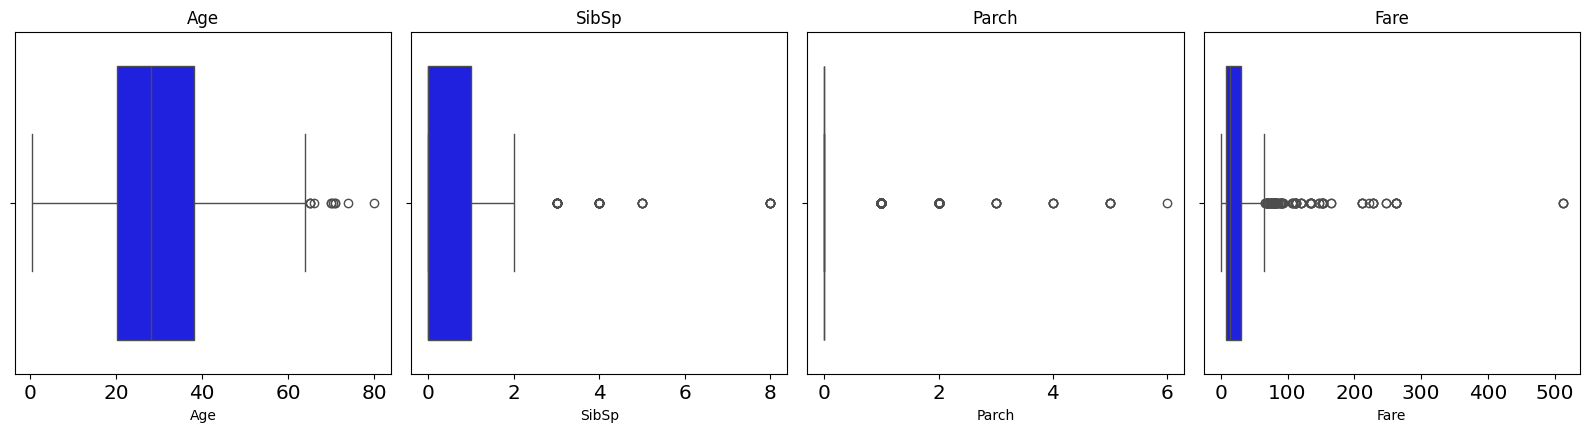

In [17]:
plt.figure(figsize=(16, 8))

for i, col in enumerate(num):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=data1[col], color="blue")
    plt.title(col)

plt.tight_layout()
plt.show()

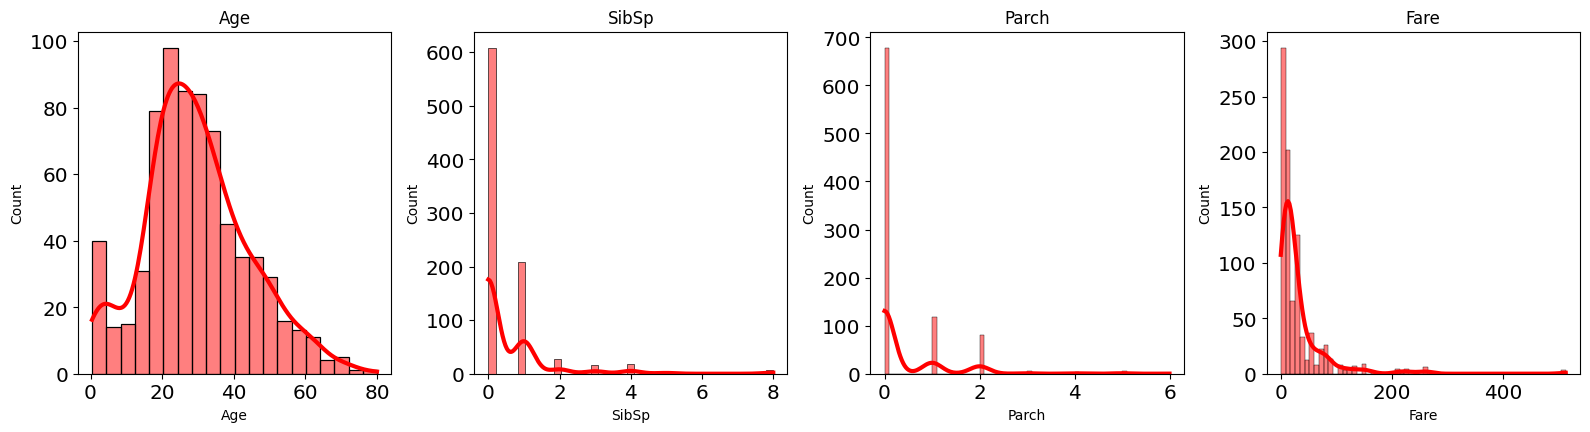

In [18]:
plt.figure(figsize=(16, 8))

for i, col in enumerate(num):
    plt.subplot(2, 4, i + 1)
    sns.histplot(data=data1, x=col, kde=True, color="red")
    plt.title(col)

plt.tight_layout()
plt.show()

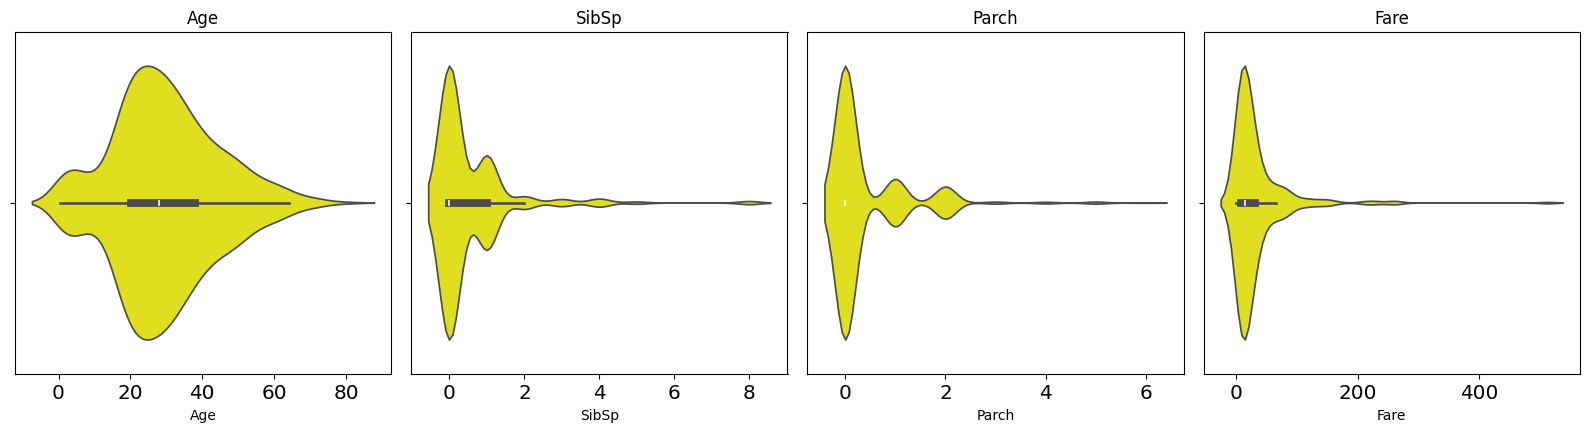

In [19]:
plt.figure(figsize=(16, 8))

for i, col in enumerate(num):
    plt.subplot(2, 4, i + 1)
    sns.violinplot(x=data1[col], color="yellow")
    plt.title(col)

plt.tight_layout()
plt.show()

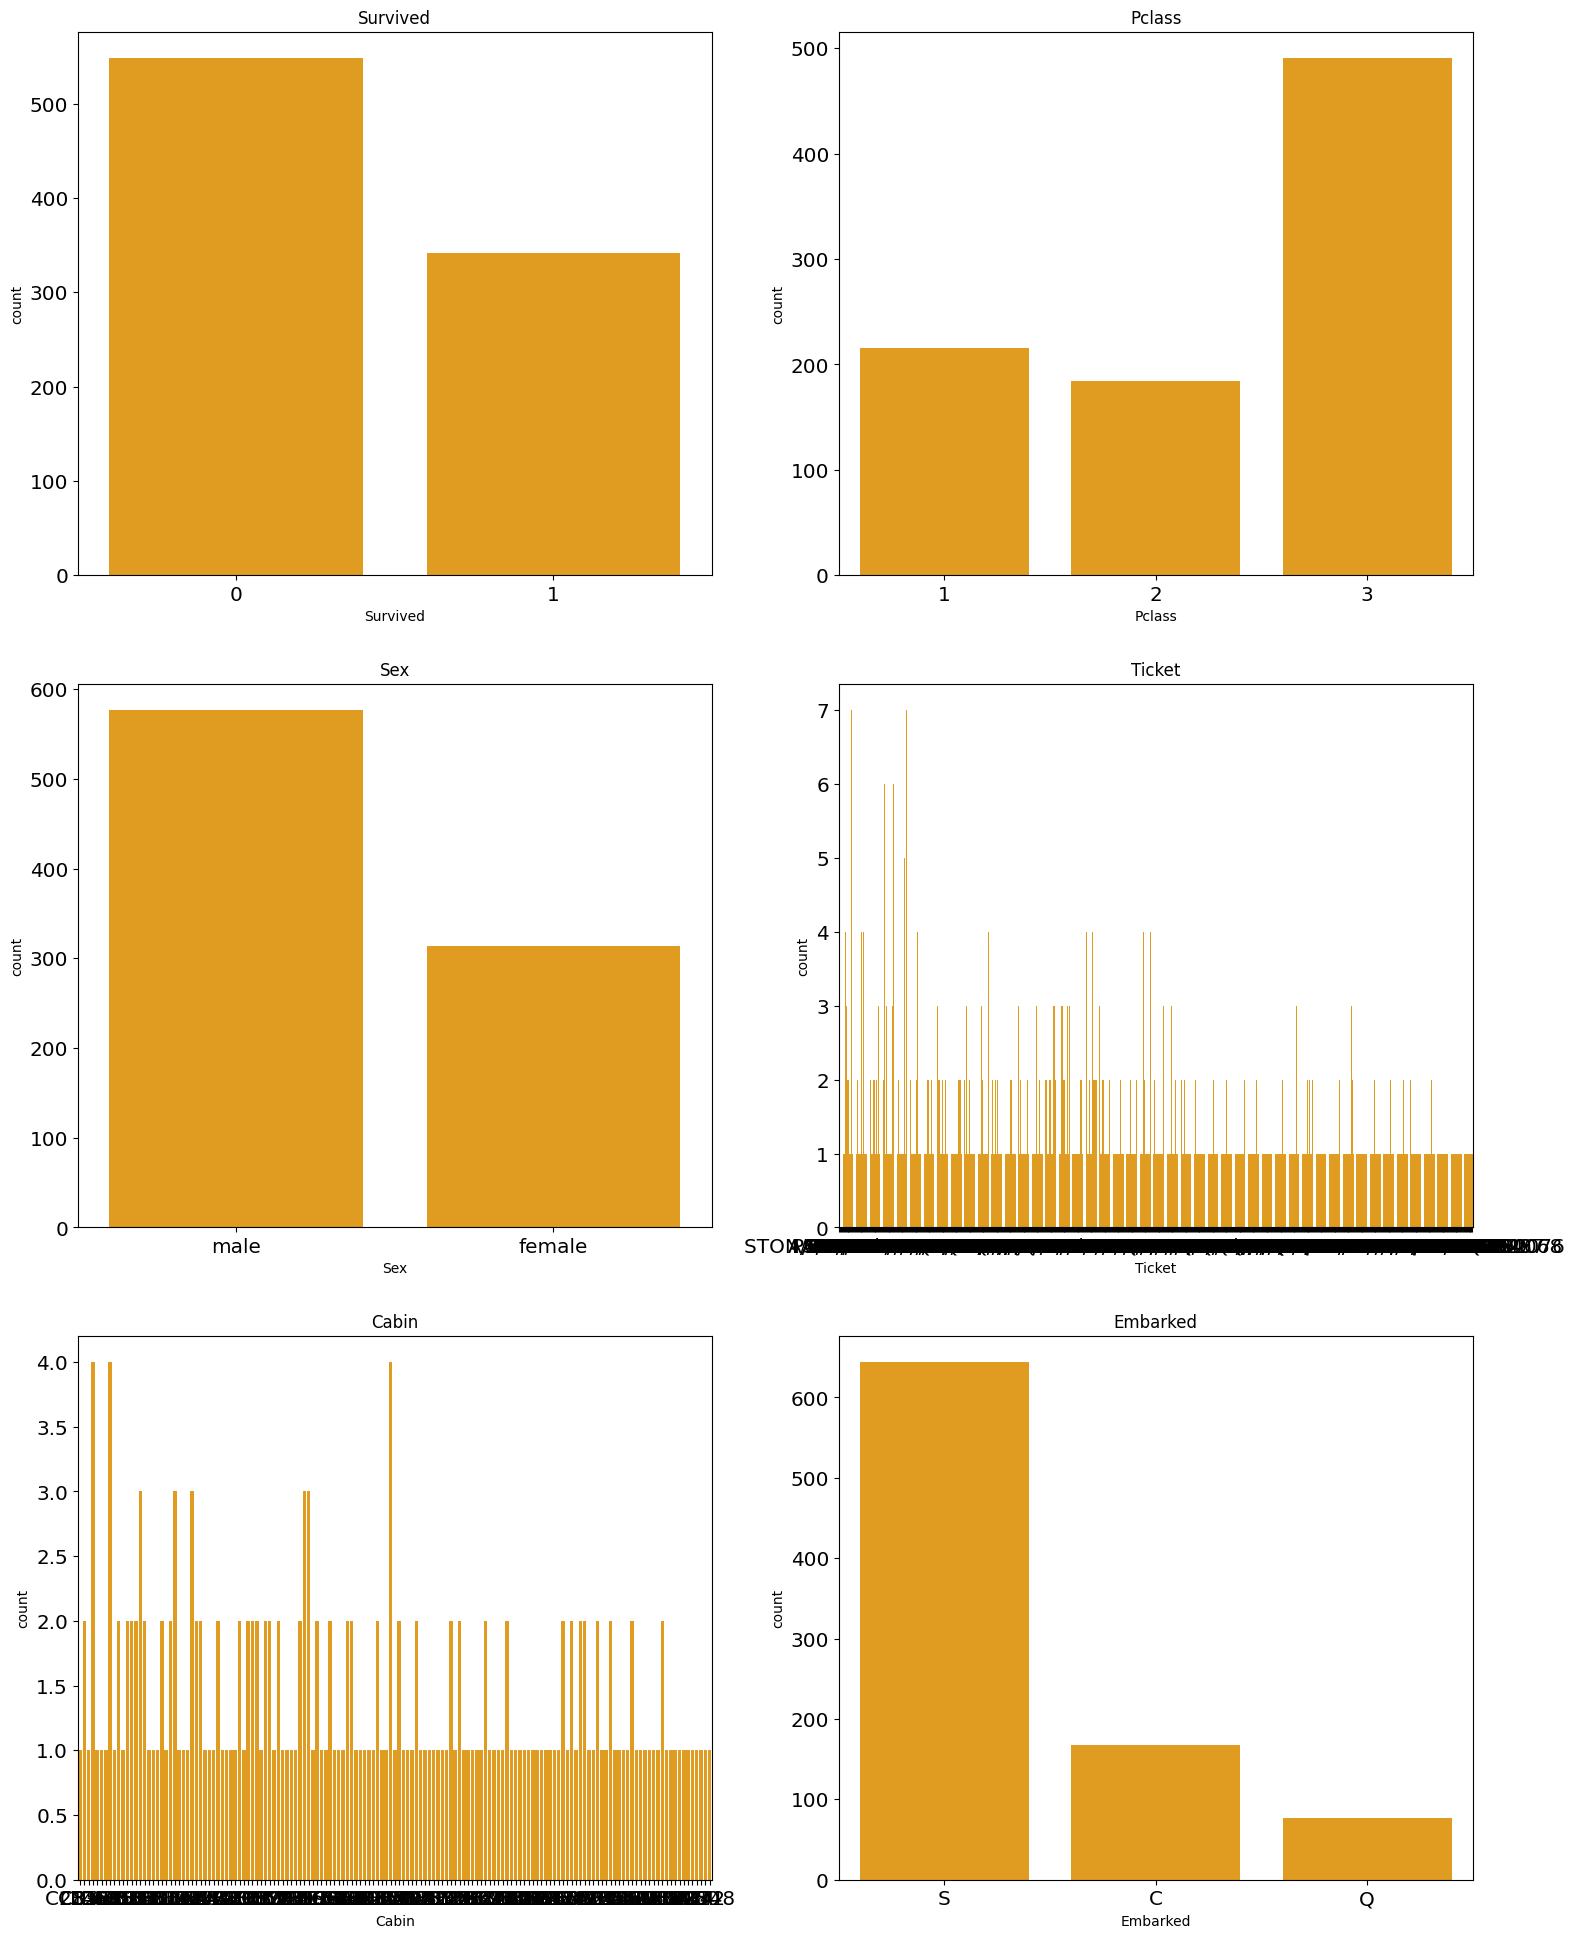

In [20]:
plt.figure(figsize=(18, 24))
n_cols = 2
n_rows = math.ceil(len(cat) / n_cols)

for i, col in enumerate(cat):
    plt.subplot(n_rows, n_cols, i + 1)
    
    sns.countplot(
        data=data1,
        x=col,
        color="orange"
    )
    
    plt.title(col)
    # plt.xticks(rotation=45)

# plt.tight_layout()
plt.show()

## Bivariate Analysis

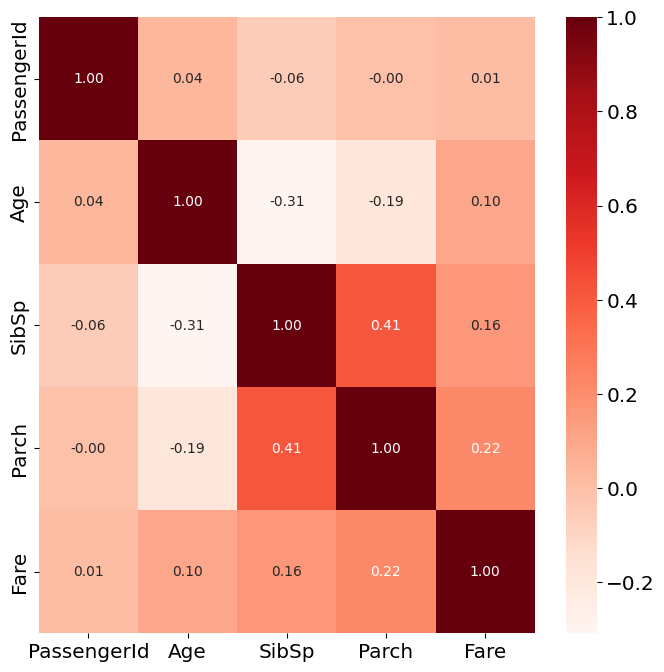

In [21]:
plt.figure(figsize=(8, 8))
corr_matrix = data1.select_dtypes(include="number").corr()

sns.heatmap(
    corr_matrix,
    cmap="Reds",
    annot=True,
    fmt=".2f"
)

plt.show()

<Figure size 1000x1000 with 0 Axes>

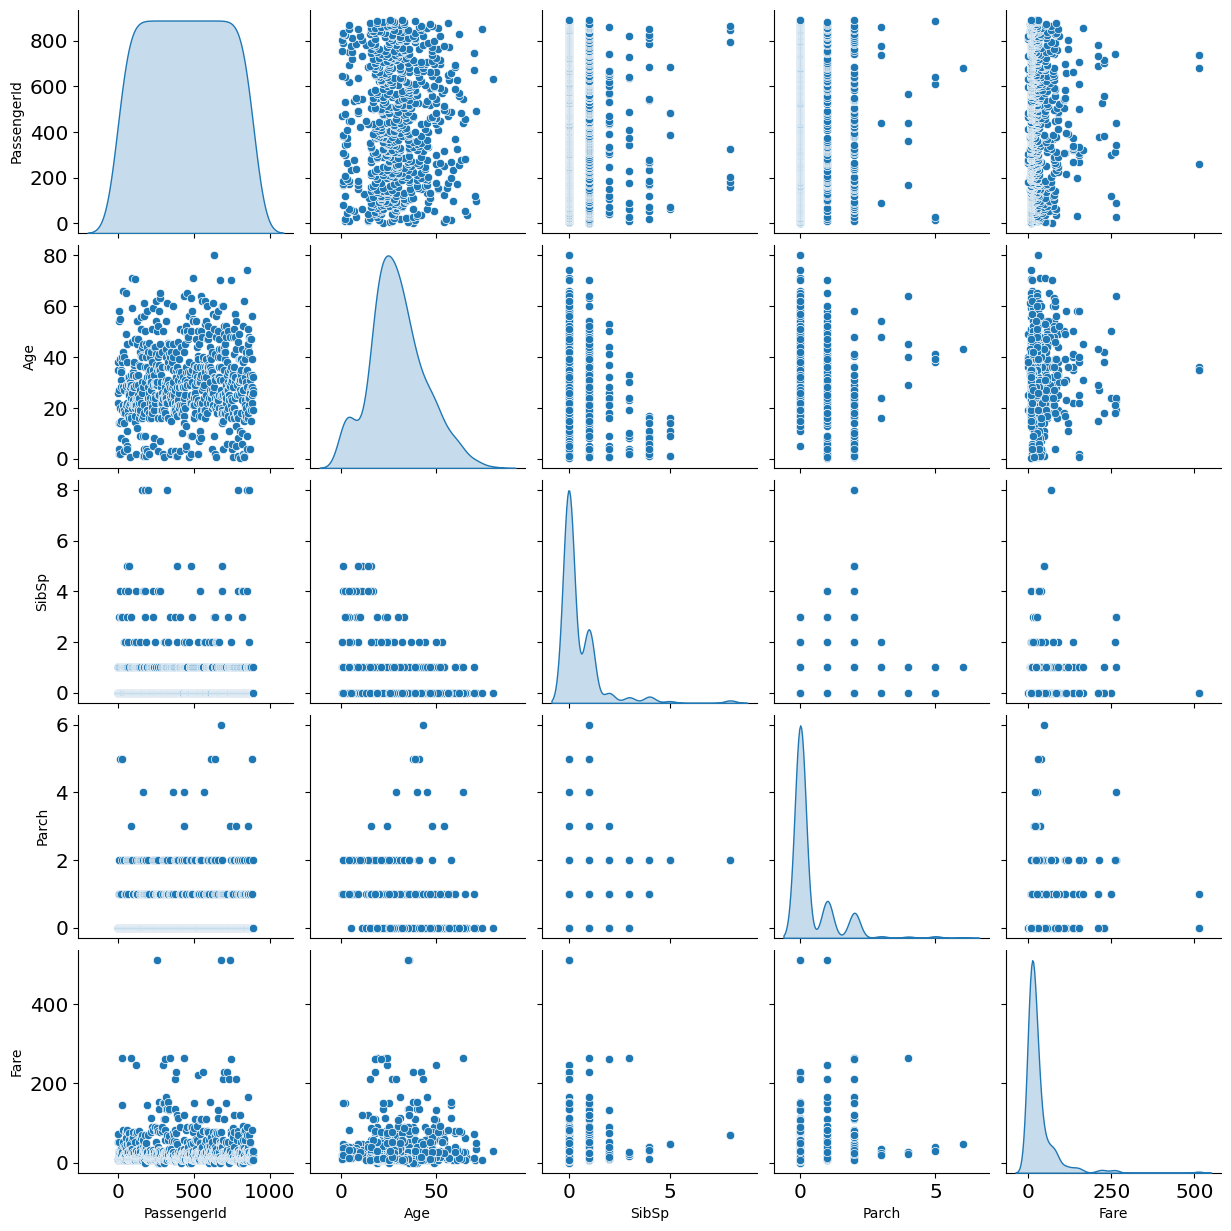

In [22]:
plt.figure(figsize=(10, 10))
sns.pairplot(
    data1,
    diag_kind="kde"
)
plt.show()

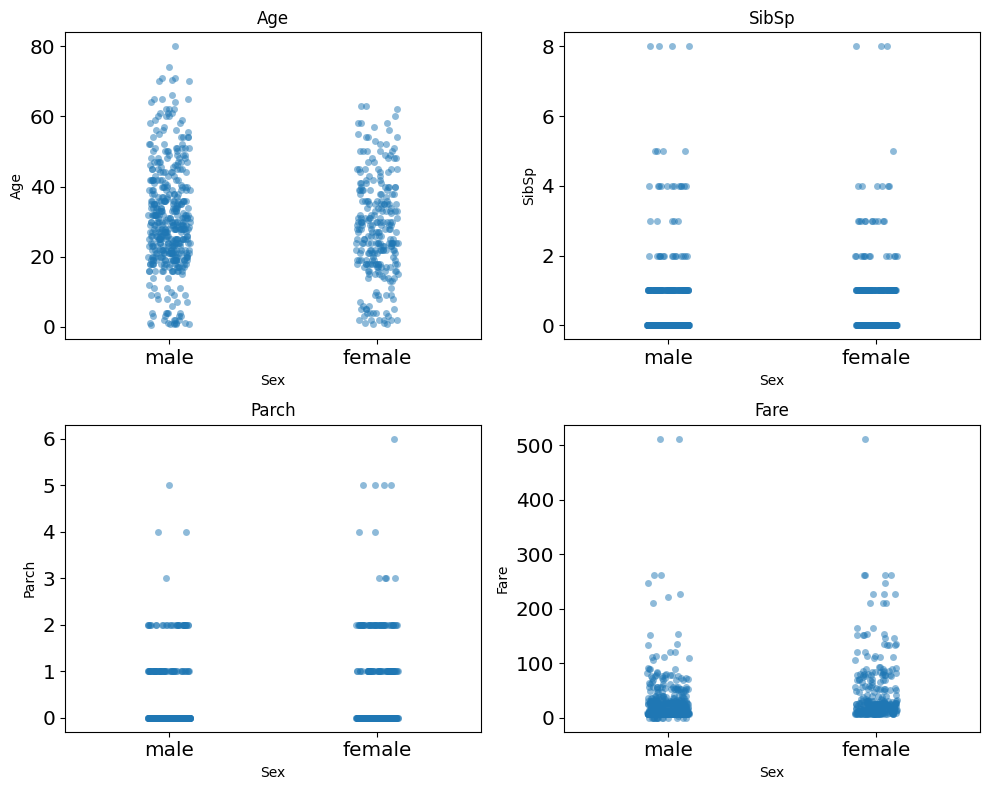

In [23]:
n_cols = 2
n_rows = math.ceil(len(num) / n_cols)

plt.figure(figsize=(10, 4 * n_rows))

for i, col in enumerate(num):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.stripplot(
        data=data1,
        x="Sex",
        y=col,
        jitter=True,
        alpha=0.5
    )
    plt.title(col)

plt.tight_layout()
plt.show()

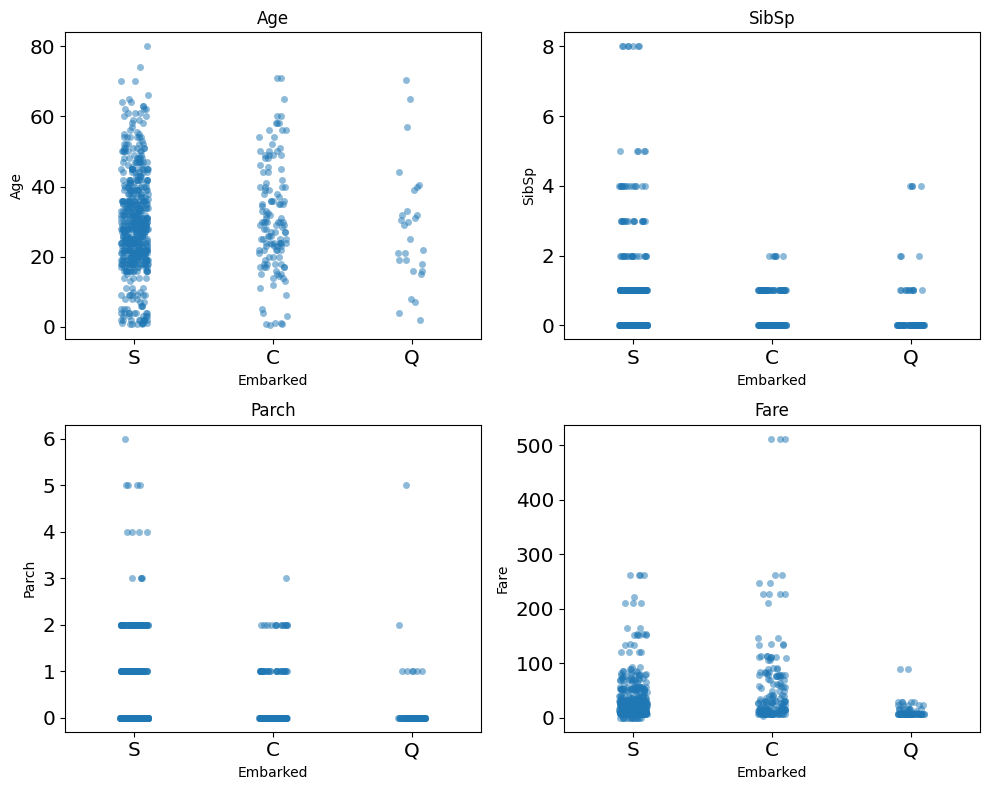

In [24]:
n_cols = 2
n_rows = math.ceil(len(num) / n_cols)

plt.figure(figsize=(10, 4 * n_rows))

for i, col in enumerate(num):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.stripplot(
        data=data1,
        x="Embarked",
        y=col,
        jitter=True,
        alpha=0.5
    )
    plt.title(col)

plt.tight_layout()
plt.show()

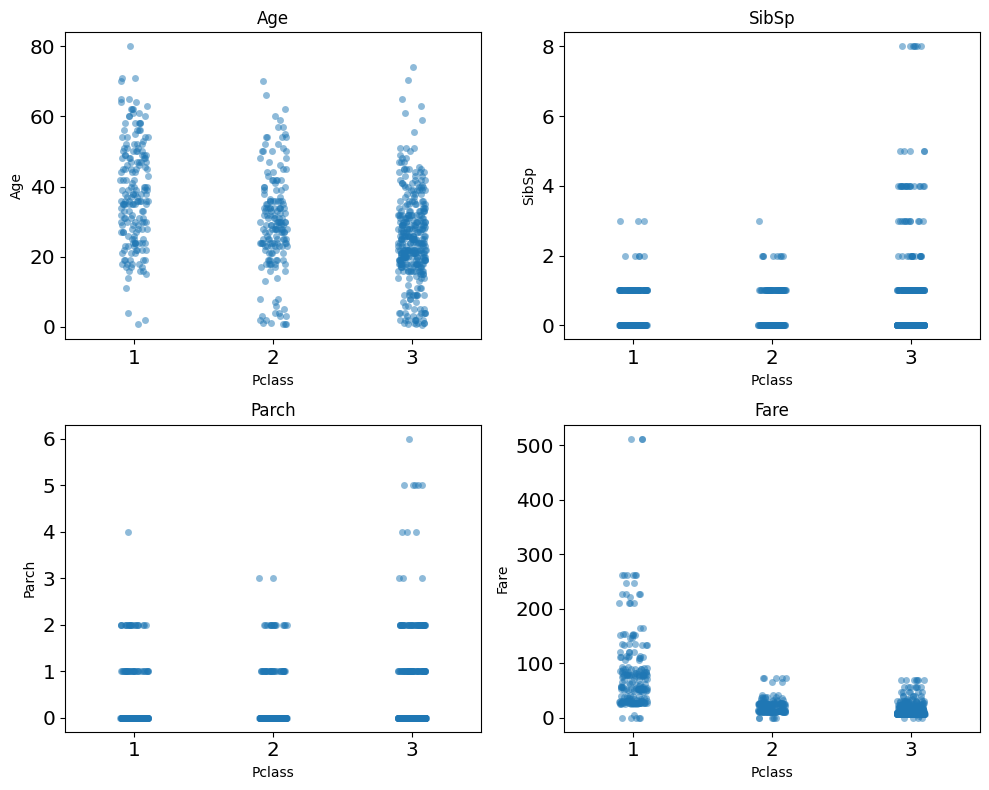

In [25]:
n_cols = 2
n_rows = math.ceil(len(num) / n_cols)

plt.figure(figsize=(10, 4 * n_rows))

for i, col in enumerate(num):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.stripplot(
        data=data1,
        x="Pclass",
        y=col,
        jitter=True,
        alpha=0.5
    )
    plt.title(col)

plt.tight_layout()
plt.show()

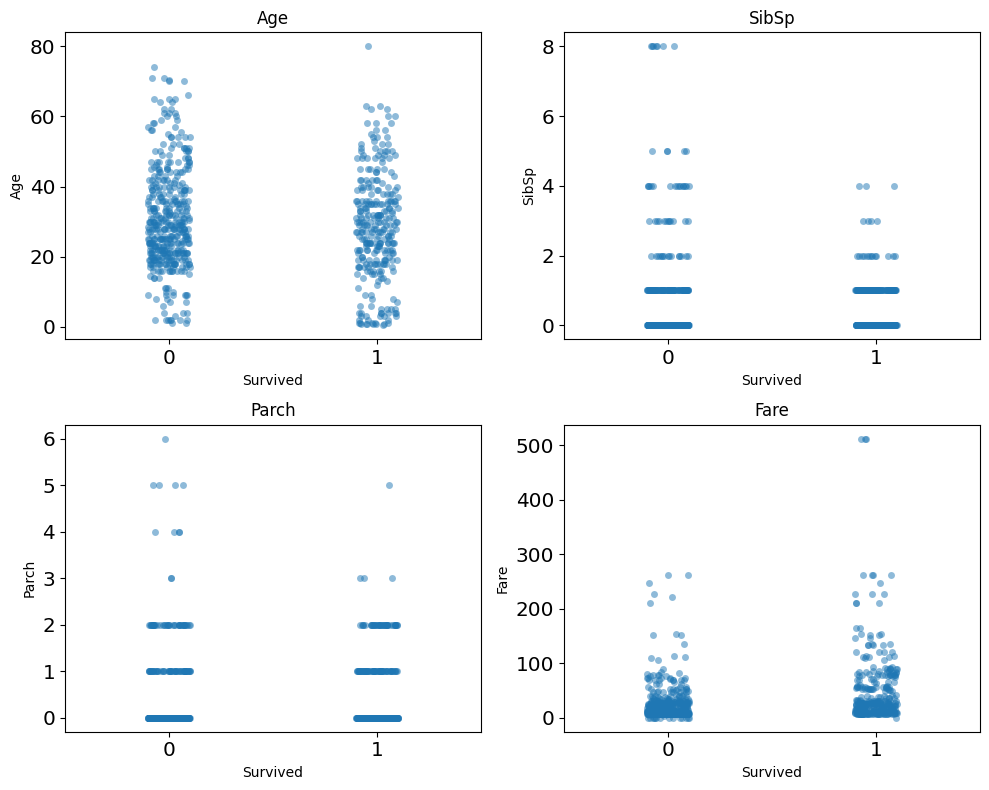

In [26]:
n_cols = 2
n_rows = math.ceil(len(num) / n_cols)

plt.figure(figsize=(10, 4 * n_rows))

for i, col in enumerate(num):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.stripplot(
        data=data1,
        x="Survived",
        y=col,
        jitter=True,
        alpha=0.5
    )
    plt.title(col)

plt.tight_layout()
plt.show()

In [27]:
data1.dropna(subset=["Embarked"], inplace=True)

In [28]:
# data1["Age"] = data1["Age"].fillna(data1["Age"].median())
data1["Age"] = data1.groupby(["Pclass", "Sex"], observed=True)["Age"].transform(lambda x: x.fillna(x.median()))

In [29]:
data1["Title"] = data1["Name"].str.extract(r' ([A-Za-z]+)\.', expand=False)
rare_titles = ["Lady", "Countess", "Capt", "Col", "Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"]

data1["Title"] = data1["Title"].replace(rare_titles, "Rare")
data1["Title"] = data1["Title"].replace({"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"})
data1["FamilySize"] = data1["SibSp"] + data1["Parch"] + 1
data1["IsAlone"] = (data1["FamilySize"] == 1).astype(int)

In [30]:
data1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
Title            0
FamilySize       0
IsAlone          0
dtype: int64

In [31]:
data2 = data1.copy()

In [32]:
data3 = data2.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"])

In [33]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Survived    889 non-null    category
 1   Pclass      889 non-null    category
 2   Sex         889 non-null    object  
 3   Age         889 non-null    float64 
 4   SibSp       889 non-null    int64   
 5   Parch       889 non-null    int64   
 6   Fare        889 non-null    float64 
 7   Embarked    889 non-null    object  
 8   Title       889 non-null    object  
 9   FamilySize  889 non-null    int64   
 10  IsAlone     889 non-null    int64   
dtypes: category(2), float64(2), int64(4), object(3)
memory usage: 71.4+ KB


In [34]:
data3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,FamilySize,IsAlone
0,0,3,male,22.0,1,0,7.2500,S,Mr,2,0
1,1,1,female,38.0,1,0,71.2833,C,Mrs,2,0
2,1,3,female,26.0,0,0,7.9250,S,Miss,1,1
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2,0
4,0,3,male,35.0,0,0,8.0500,S,Mr,1,1


In [35]:
data3.isna().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
Title         0
FamilySize    0
IsAlone       0
dtype: int64

In [36]:
df_clean = data3

df_clean.to_csv("titanic_survived_clean.csv", index=False)
print("Saved: titanic_survived_clean.csv")

Saved: titanic_survived_clean.csv


## Machine Learning Training

In [37]:
data_clean = data3.copy()

num = ["Age", "SibSp", "Parch", "Fare", "FamilySize"]
cat = ["Pclass", "Sex", "Embarked", "Title", "IsAlone"]

X = data_clean[num + cat]
y = data_clean[target].astype(int)

X = pd.get_dummies(X, columns=cat, drop_first=False)

print(cat)
print(num)

['Pclass', 'Sex', 'Embarked', 'Title', 'IsAlone']
['Age', 'SibSp', 'Parch', 'Fare', 'FamilySize']


In [38]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [39]:
model = XGBClassifier(
    random_state=42,
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss"
)

model.fit(X_train, y_train)
preds = model.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.8258426966292135

In [40]:
cv = StratifiedKFold(
    n_splits=5,
    shuffle=True,
    random_state=42
)

model = XGBClassifier(
    random_state=42,
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss"
)

scores = cross_val_score(
    model,
    X,
    y,
    cv=cv,
    scoring="accuracy"
)

print("CV Scores:", scores)
print("Mean:", scores.mean())
print("Std:", scores.std())

CV Scores: [0.87078652 0.80337079 0.81460674 0.83707865 0.84745763]
Mean: 0.8346600647495714
Std: 0.023899382459604303


In [41]:
param_grid = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 4, 5, 6],
    "learning_rate": [0.01, 0.05, 0.1],
    "subsample": [0.7, 0.8, 0.9],
    "colsample_bytree": [0.7, 0.8, 0.9]
}

model = XGBClassifier(
    random_state=42,
    n_estimators=400,
    max_depth=4,
    learning_rate=0.05,
    subsample=0.8,
    colsample_bytree=0.8,
    eval_metric="logloss"
)

random_search = RandomizedSearchCV(
    model,
    param_distributions=param_grid,
    n_iter=20,
    cv=cv,
    scoring="accuracy",
    verbose=1,
    n_jobs=-1
)

random_search.fit(X, y)

print("Best params:", random_search.best_params_)
print("Best score:", random_search.best_score_)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best params: {'subsample': 0.8, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.01, 'colsample_bytree': 0.7}
Best score: 0.8470132673141624


In [42]:
best_model = random_search.best_estimator_

best_model.fit(X, y)

,"objective objective: typing.Union[str, xgboost.sklearn._SklObjWProto, typing.Callable[[typing.Any, typing.Any], typing.Tuple[numpy.ndarray, numpy.ndarray]], NoneType]Specify the learning task and the corresponding learning objective or a customobjective function to be used.For custom objective, see :doc:`/tutorials/custom_metric_obj` and:ref:`custom-obj-metric` for more information, along with the end note forfunction signatures.",'binary:logistic'
,"base_score base_score: typing.Union[float, typing.List[float], NoneType]The initial prediction score of all instances, global bias.",None
,booster,None
,"callbacks callbacks: typing.Optional[typing.List[xgboost.callback.TrainingCallback]]List of callback functions that are applied at end of each iteration.It is possible to use predefined callbacks by using:ref:`Callback API `... note:: States in callback are not preserved during training, which means callback objects can not be reused for multiple training sessions without reinitialization or deepcopy... code-block:: python for params in parameters_grid: # be sure to (re)initialize the callbacks before each run callbacks = [xgb.callback.LearningRateScheduler(custom_rates)] reg = xgboost.XGBRegressor(**params, callbacks=callbacks) reg.fit(X, y)",None
,colsample_bylevel colsample_bylevel: typing.Optional[float]Subsample ratio of columns for each level.,None
,colsample_bynode colsample_bynode: typing.Optional[float]Subsample ratio of columns for each split.,None
,colsample_bytree colsample_bytree: typing.Optional[float]Subsample ratio of columns when constructing each tree.,0.7
,"device device: typing.Optional[str].. versionadded:: 2.0.0Device ordinal, available options are `cpu`, `cuda`, and `gpu`.",None
,"early_stopping_rounds early_stopping_rounds: typing.Optional[int].. versionadded:: 1.6.0- Activates early stopping. Validation metric needs to improve at least once in every **early_stopping_rounds** round(s) to continue training. Requires at least one item in **eval_set** in :py:meth:`fit`.- If early stopping occurs, the model will have two additional attributes: :py:attr:`best_score` and :py:attr:`best_iteration`. These are used by the :py:meth:`predict` and :py:meth:`apply` methods to determine the optimal number of trees during inference. If users want to access the full model (including trees built after early stopping), they can specify the `iteration_range` in these inference methods. In addition, other utilities like model plotting can also use the entire model.- If you prefer to discard the trees after `best_iteration`, consider using the callback function :py:class:`xgboost.callback.EarlyStopping`.- If there's more than one item in **eval_set**, the last entry will be used for early stopping. If there's more than one metric in **eval_metric**, the last metric will be used for early stopping.",None
,enable_categorical enable_categorical: boolSee the same parameter of :py:class:`DMatrix` for details.,False
,"eval_metric eval_metric: typing.Union[str, typing.List[typing.Union[str, typing.Callable]], typing.Callable, NoneType].. versionadded:: 1.6.0Metric used for monitoring the training result and early stopping. It can be astring or list of strings as names of predefined metric in XGBoost (See:doc:`/parameter`), one of the metrics in :py:mod:`sklearn.metrics`, or anyother user defined metric that looks like `sklearn.metrics`.If custom objective is also provided, then custom metric should implement thecorresponding reverse link function.Unlike the `scoring` parameter commonly used in scikit-learn, when a callableobject is provided, it's assumed to be a cost function and by default XGBoostwill minimize the result during early stopping.For advanced usage on Early stopping like directly choosing to maximize insteadof minimize, see :py:obj:`xgboost.callback.EarlyStopping`.See :doc:`/tutorials/custom_metric_obj` and :ref:`custom-obj-metric` for moreinformation... code-block:: python from sklearn.datasets import load_diabetes f

## Inference 

In [43]:
test_df = pd.read_csv("test.csv")

In [44]:
test_clean = test_df.drop(columns=["Cabin", "Ticket"], errors="ignore").copy()

In [45]:
"""
age_median = data_clean["Age"].median()
emb_mode = data_clean["Embarked"].mode()[0]
fare_median = data_clean["Fare"].median()

test_clean["Age"] = test_clean["Age"].fillna(age_median)
test_clean["Embarked"] = test_clean["Embarked"].fillna(emb_mode)
test_clean["Fare"] = test_clean["Fare"].fillna(fare_median)
"""

emb_mode = data_clean["Embarked"].mode()[0]
fare_median = data_clean["Fare"].median()

test_clean["Embarked"] = test_clean["Embarked"].fillna(emb_mode)
test_clean["Fare"] = test_clean["Fare"].fillna(fare_median)

age_medians = (
    data_clean
    .groupby(["Pclass", "Sex"], observed=True)["Age"]
    .median()
)

def fill_age(row):
    if pd.isna(row["Age"]):
        return age_medians.loc[(row["Pclass"], row["Sex"])]
    return row["Age"]

test_clean["Age"] = test_clean.apply(fill_age, axis=1)

In [46]:
test_clean["Title"] = test_clean["Name"].str.extract(r' ([A-Za-z]+)\.', expand=False)

rare_titles = ["Lady", "Countess", "Capt", "Col", "Don", "Dr",
               "Major", "Rev", "Sir", "Jonkheer", "Dona"]

test_clean["Title"] = test_clean["Title"].replace(rare_titles, "Rare")
test_clean["Title"] = test_clean["Title"].replace({"Mlle": "Miss", "Ms": "Miss", "Mme": "Mrs"})
test_clean["FamilySize"] = test_clean["SibSp"] + test_clean["Parch"] + 1
test_clean["IsAlone"] = (test_clean["FamilySize"] == 1).astype(int)

In [47]:
test_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
 9   Title        418 non-null    object 
 10  FamilySize   418 non-null    int64  
 11  IsAlone      418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


In [48]:
X_2 = test_clean[num + cat].copy()
X_2 = pd.get_dummies(X_2, columns=cat, drop_first=False)

In [49]:
X_2 = X_2.reindex(columns=X.columns, fill_value=0)

In [50]:
test_preds = best_model.predict(X_2).astype(int)

In [51]:
submission = pd.DataFrame({
    id_col: test_df[id_col],
    target: test_preds
})

submission.to_csv("titanic_infer.csv", index=False)
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
